In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.utilities import load_images_to_dict, move_color_axis

In [2]:
#
# Load all images and apply their masks to them
#


# keys are file names and values are the images
masks: dict = load_images_to_dict('./imgs/mask/')
imgs: dict = load_images_to_dict('./imgs/original')

# masks and images have the same filename
img_names = list(imgs.keys())
mask_names = list(masks.keys())
print(img_names)
print(mask_names)
print(f"image shape: {imgs[img_names[0]].shape}")

# apply masks to images
masked = {}
for k in imgs.keys():
    # move color dim to front: H*W*color -> color*H*W
    img = move_color_axis(imgs[k], -1, 0)
    msk = masks[k]
    # apply mask
    mskd = img*msk
    # reshape to H*W*color
    mskd = move_color_axis(mskd, 0, -1)
    masked[k] = mskd

['img_t016.png', 'img_t008.png', 'img_t002.png', 'img_t003.png', 'img_t000.png', 'img_t020.png', 'img_t019.png', 'img_t017.png', 'img_t009.png', 'img_t007.png', 'img_t005.png', 'img_t006.png', 'img_t015.png', 'img_t014.png', 'img_t011.png']
['img_t016.png', 'img_t008.png', 'img_t002.png', 'img_t003.png', 'img_t000.png', 'img_t020.png', 'img_t019.png', 'img_t017.png', 'img_t009.png', 'img_t007.png', 'img_t005.png', 'img_t006.png', 'img_t015.png', 'img_t014.png', 'img_t011.png']
image shape: (1000, 1000, 3)


In [6]:
masked

.56078434, 0.54901963, 0.31764707]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22745098, 0.25882354, 0.11764706],
         [0.32941177, 0.3647059 , 0.1254902 ],
         [0.6313726 , 0.65882355, 0.29803923]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
  

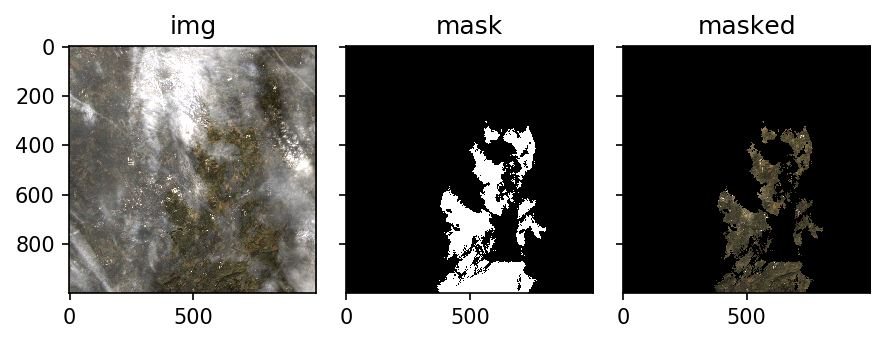

In [3]:
n = 'img_t003.png'
f, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=150, sharex=True, sharey=True)
# f.suptitle(n)
ax1.imshow(imgs[n], label='test'); ax1.set_title('img')
ax2.imshow(masks[n], cmap='gray'); ax2.set_title('mask')
ax3.imshow(masked[n]); ax3.set_title('masked')
f.tight_layout()
plt.show()

In [4]:
# How many different RGB values do the images have?
im = np.array(list(masked.values())).reshape(-1, 3) * 255 # reshape and unnormalize
n_colors = np.unique(im,axis=0) - 1

print(f"Different colors of ground pixels: {n_colors.shape[0]}")

Different colors of ground pixels: 294494


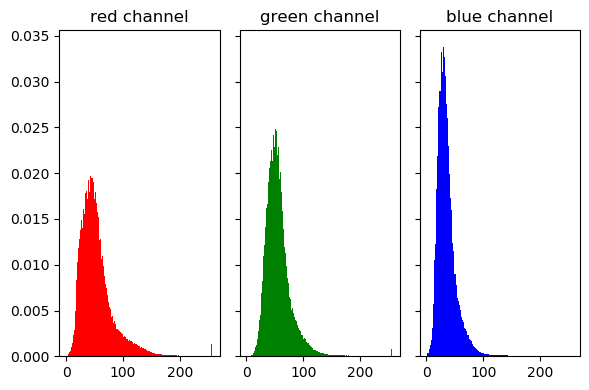

In [5]:
# histograms of color channels

f2, h = plt.subplots(1,3, dpi=100, sharey=True)
c, t = 'rgb', ['red channel', 'green channel', 'blue channel']
for i in range(3):
    # histogram excluding [0,0,0]
    _ = h[i].hist(im[:, i], bins=255, range=(1, 257), facecolor=c[i], density=True)
    h[i].set_title(t[i])
f2.tight_layout()
plt.show()